In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import sympy as smp
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [258]:
#parametros basicos
spr = 44100
spi = 1/spr

In [259]:
def load_wav(path):
    a = read(path)
    return np.array(a[1],dtype=float)

def write_wav(wave, path):
    scaled = np.int16(wave / np.max(np.abs(wave)) * 32767/4)
    # scaled = np.int16(wave)
    write(path, spr, scaled)

In [260]:
def find_C(wave, time, f):
    C = 0
    for i in range(len(wave)):
        C += np.exp(-1j*2*np.pi*f*time[i])*wave[i]

    arg = np.angle(C)
    mod = np.sqrt(np.real(C)**2 + np.imag(C)**2)

    return mod, arg

def create_wave(f, mod, arg, max_amp, time):
    wave = 0
    for i in range(len(f)):
        wave += mod[i]*np.cos(2*np.pi*f[i]*time + arg[i])
    
    wave = wave * max_amp/max(wave)
    return wave

In [261]:
def plot_f(wave, time):
    f = np.arange(0, 8000, 0.5)
    mod, arg= find_C(wave, time, f)

    plt.plot(f, mod)

def plot_wave(wave, time):
    plt.plot(time, wave)
    #plt.xlim(0,0.05)


In [262]:
def processamento(wave):
    time = np.arange(0, len(wave)/spr, spi)
    f = np.arange(0, 8000, 0.5)
    
    mod, arg = find_C(wave, time, f)

    i_max = mod.argmax()
    f_max = f[i_max]
    mod_max = mod[i_max]
    arg_max = arg[i_max]

    mod_normal = mod/mod_max
    arg_normal = arg - arg_max

    wave_normal = 0
    for i in range(len(f)):
        wave_normal += mod_normal[i]*np.cos(2*np.pi*f[i]*time + arg_normal[i])

    return f_max, wave_normal, arg_max

def reconstruir(wave_normal_timbre, arg_max, max_amp):
    time = np.arange(0, len(wave_normal_timbre)/spr, spi)
    f = np.arange(0, 8000, 0.5)

    mod, arg = find_C(wave_normal_timbre, time, f)

    arg = arg + arg_max

    wave_timbre = create_wave(f, mod, arg, max_amp, time)

    return wave_timbre


113.5


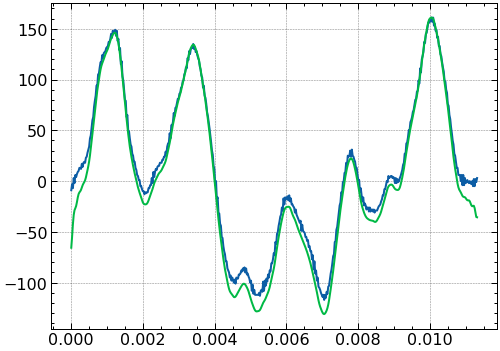

In [263]:
wave = load_wav('la.wav')[13330:13830]
time = np.arange(0, len(wave)/spr, spi)

#time = np.arange(0, 1, spi)
#wave = 1.23*np.cos(2*np.pi*100*time + 0.72) + 6.12*np.cos(2*np.pi*200*time + 1.15) + 2.2*np.cos(2*np.pi*300*time + 0.69)

f_max, wave_normal, arg_max = processamento(wave)
wave_timbre = reconstruir(wave_normal, arg_max, max(wave))

print(f_max)

plot_wave(wave, time)
plot_wave(wave_timbre, time)

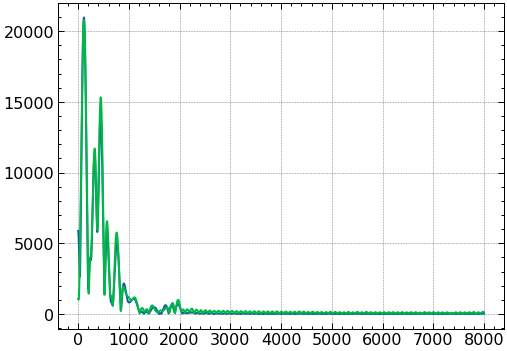

In [264]:
plot_f(wave, time)
plot_f(wave_timbre, time)